<a href="https://colab.research.google.com/github/justakaigood/banana/blob/master/tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
len(x_train),len(x_test)

(60000, 10000)

In [9]:
x_train.shape

(60000, 28, 28)

這是 T-shirt/top


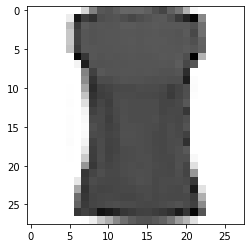

In [10]:
n=3333
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

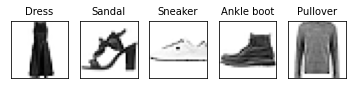

In [11]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train=to_categorical(y_train,10)

In [0]:
y_test=to_categorical(y_test,10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(54, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.05),
             metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 40s 329ms/step - loss: 0.0186 - accuracy: 0.8730
Epoch 2/10
120/120 [==============================] - 39s 327ms/step - loss: 0.0181 - accuracy: 0.8768
Epoch 3/10
120/120 [==============================] - 39s 327ms/step - loss: 0.0177 - accuracy: 0.8801
Epoch 4/10
120/120 [==============================] - 39s 327ms/step - loss: 0.0175 - accuracy: 0.8821
Epoch 5/10
120/120 [==============================] - 39s 325ms/step - loss: 0.0172 - accuracy: 0.8840
Epoch 6/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0170 - accuracy: 0.8859
Epoch 7/10
120/120 [==============================] - 39s 325ms/step - loss: 0.0167 - accuracy: 0.8873
Epoch 8/10
120/120 [==============================] - 39s 327ms/step - loss: 0.0166 - accuracy: 0.8889
Epoch 9/10
120/120 [==============================] - 39s 327ms/step - loss: 0.0164 - accuracy: 0.8902
Epoch 10/10
120/120 [==============================] - 39s 327ms/step - l

In [35]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):
    print(' CNN預測', result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

In [0]:
from ipywidgets import interact_manual

In [38]:
interact_manual(my_predict, n=(0, 500))

interactive(children=(IntSlider(value=250, description='n', max=500), Button(description='Run Interact', style…

<function __main__.my_predict>

In [40]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0194 - accuracy: 0.8668


In [0]:
loss, acc = score

In [42]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8668000102043152


In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.5),
             metrics=['accuracy'])

In [44]:
model.fit(x_train, y_train, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0555 - accuracy: 0.6465
Epoch 2/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0198 - accuracy: 0.8643
Epoch 3/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0183 - accuracy: 0.8743
Epoch 4/10
120/120 [==============================] - 39s 323ms/step - loss: 0.0170 - accuracy: 0.8841
Epoch 5/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0159 - accuracy: 0.8923
Epoch 6/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0152 - accuracy: 0.8978
Epoch 7/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0147 - accuracy: 0.9016
Epoch 8/10
120/120 [==============================] - 39s 323ms/step - loss: 0.0142 - accuracy: 0.9048
Epoch 9/10
120/120 [==============================] - 39s 324ms/step - loss: 0.0137 - accuracy: 0.9083
Epoch 10/10
120/120 [==============================] - 39s 325ms/step - l

In [45]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0175 - accuracy: 0.8813


In [0]:
loss, acc = score

In [47]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8812999725341797


In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.9),
             metrics=['accuracy'])

In [49]:
model.fit(x_train, y_train, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 39s 323ms/step - loss: 0.0172 - accuracy: 0.8834
Epoch 2/10
120/120 [==============================] - 39s 322ms/step - loss: 0.0148 - accuracy: 0.9003
Epoch 3/10
120/120 [==============================] - 39s 323ms/step - loss: 0.0140 - accuracy: 0.9061
Epoch 4/10
120/120 [==============================] - 39s 322ms/step - loss: 0.0135 - accuracy: 0.9097
Epoch 5/10
120/120 [==============================] - 39s 322ms/step - loss: 0.0129 - accuracy: 0.9143
Epoch 6/10
120/120 [==============================] - 39s 322ms/step - loss: 0.0128 - accuracy: 0.9149
Epoch 7/10
120/120 [==============================] - 39s 323ms/step - loss: 0.0121 - accuracy: 0.9197
Epoch 8/10
120/120 [==============================] - 39s 323ms/step - loss: 0.0119 - accuracy: 0.9219
Epoch 9/10
120/120 [==============================] - 39s 323ms/step - loss: 0.0116 - accuracy: 0.9240
Epoch 10/10
120/120 [==============================] - 39s 323ms/step - l

In [50]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0164 - accuracy: 0.8904


In [0]:
loss, acc = score

In [53]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8903999924659729


經過2次的重複訓練，更改lr值會影響訓練結果的準確度，數值上調似乎能提高準確率